# Model Evaluation and refinement 
overfitting-underfitting analyses using ridge regression, cross validation,grid search

In [1]:
## importing required libraries
import pandas as pd
import numpy as np

In [2]:
## creating the dataframe for the analysis
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
## getting only numeric data for the dataframe:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Libraries for plotting

In [4]:
%%capture
! pip install ipywidgets

In [5]:
## importing the correct libraries for plotting:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

## Creating the functions for plotting the distribution and the test-train plots:

In [6]:
## the function for plotting the distribution plot:

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
## plotting the test and train data:

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and testing for the given data:

In [8]:
## splitting the given data into training and testing parts:

## taking the target variable and dropping it from the dataset:
y_data = df['price']
x_data = df.drop('price',axis=1)

In [9]:
x_data.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [10]:
## using the sklearn package to splt the given dataset into folds:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.15,random_state=0)

print("no.of test samples", x_test.shape[0] )
print("no.of train samples", x_train.shape[0])

no.of test samples 31
no.of train samples 170


### Creating a linear regression model and fitting the given data:

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## fitting the given data into the model:
lr.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
## calculating the values of R^2 on test and train data:
lr.score(x_train[['horsepower']],y_train)

0.6073084131435766

In [13]:
lr.score(x_test[['horsepower']],y_test)
## as we keep increasing the data for training, the value of r^2 increases foor training data and decreases for testing data(tried on 90%)

0.7923078995990716

## Cross-validation
When we dont have enough data for testing, we use cross validation for better performance of the model

#### cross validation score and cross validation predict:

In [14]:
from sklearn.model_selection import cross_val_score
Rscores = cross_val_score(lr,x_train[['horsepower']],y_train,cv=4)

In [15]:
## by default r^2 is used as the defining metric for evaluation:
Rscores

array([0.6399882 , 0.6905303 , 0.53913898, 0.46043509])

In [16]:
## we can use 'neg_mean_squared_error' to calcuate the MSE of the data:

# to be remembered: the data it outputs is in -ve:

Mse= (-1 * cross_val_score(lr,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error'))

In [17]:
## calculating the mean std of mse and r^2:
print(Rscores.mean(),Rscores.std(),Mse.mean(),Mse.std())

## when tested using twofolds, did'nt get too much of a difference 

0.5825231444129886 0.08910030429240041 23525298.54198599 11997952.238146853


In [18]:
## using cross_val_predict to predict the given function:

from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting and Model selection:

In [19]:
## creating a multiple linear regression object:
lre = LinearRegression()

lre.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
yhat_train = lre.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([10028.32225895,  7611.01064162, 20199.29545675,  8331.89690778,
       11254.40649734])

In [21]:
yhat_test = lre.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([ 5130.52405108, 10413.03767013, 19889.78098775, 21975.03524195,
       20759.69146157])

### Using model evaluation to visually see how the data performed

In [22]:
##IMPORTING ALL THE REQUIRED LIBRARIRES:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

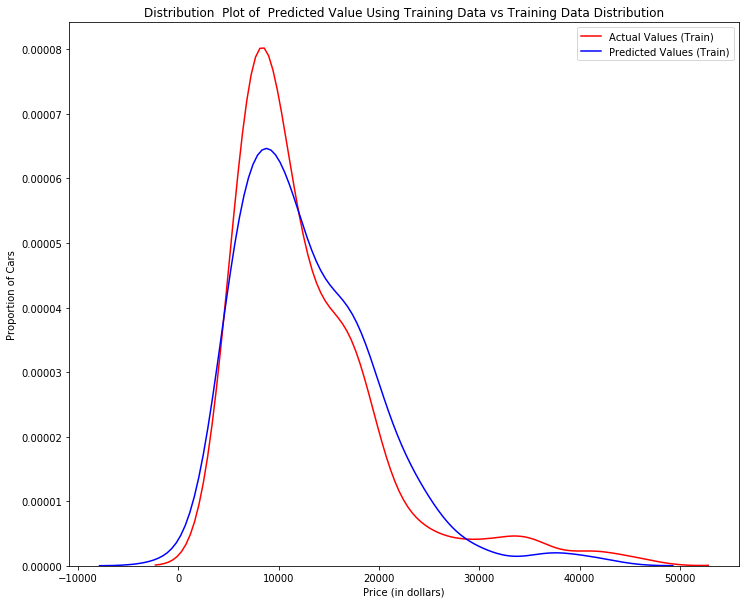

In [23]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

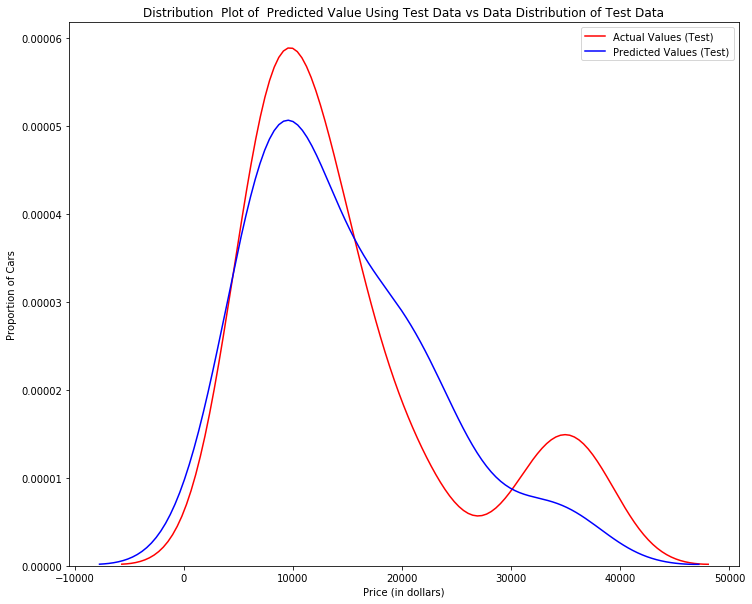

In [24]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [25]:
##CHECKING IF THE SAME HAPPENS WITH POLYMIAL WITH DIFFERENT DEGREES:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.45,random_state=0)

x_train_poly = poly.fit_transform(x_train[['horsepower']])
x_test_poly = poly.fit_transform(x_test[['horsepower']])
poly

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [27]:
pl = LinearRegression()
pl.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
yhat = pl.predict(x_test_poly)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [29]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


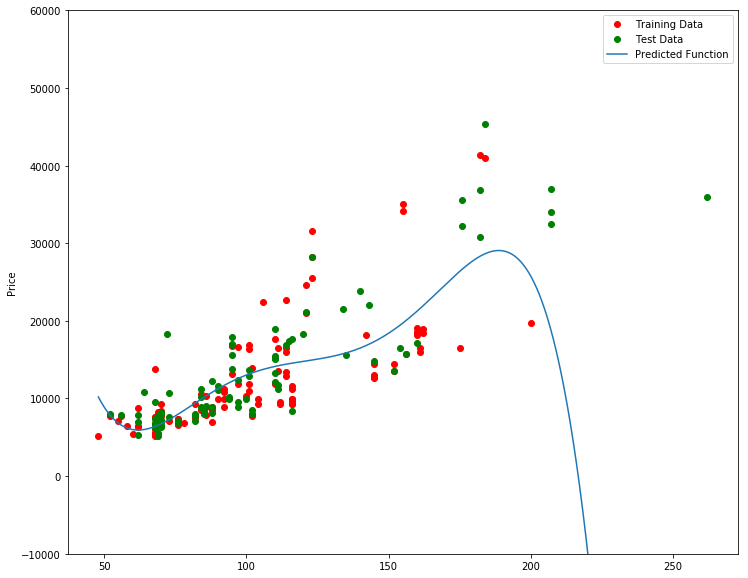

In [30]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, pl,poly)

In [31]:
## calculating the r^2 values of the test data:
pl.score(x_train_poly,y_train)

0.5567716899817778

In [32]:
pl.score(x_test_poly,y_test)

##r^2 is a sign of overfitting the model

-29.871838229908324

#### how the value of r^2 changes with different order polynomials:

Text(3, 0.75, 'Maximum R^2 ')

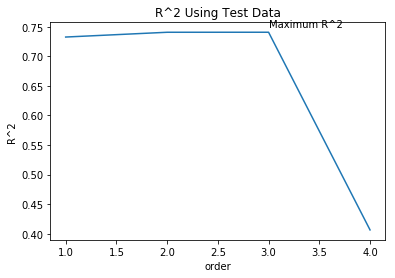

In [33]:
## rsq test:
lr = LinearRegression()
rsq_test = []
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr,y_train)
    
    rsq_test.append(lr.score(x_test_pr,y_test))

plt.plot(order, rsq_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [34]:
rsq_test

[0.7325101750243118,
 0.7405858710699834,
 0.7406204232772033,
 0.40639663674298854]

In [35]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

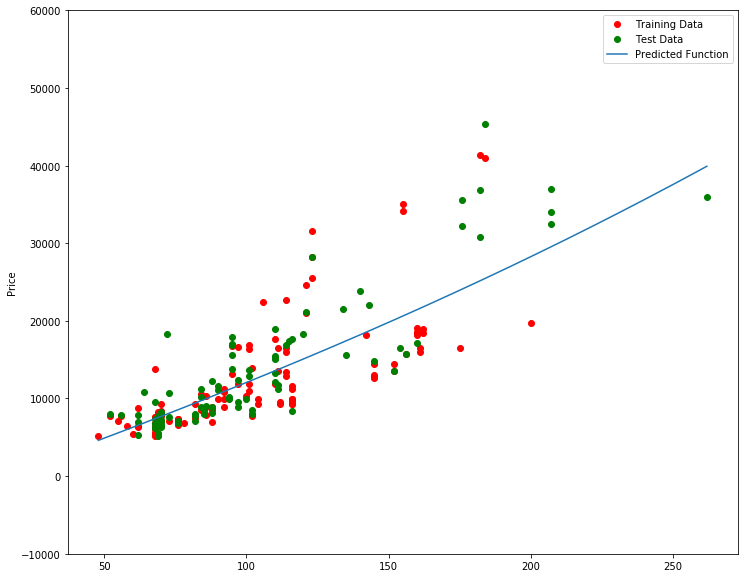

<function __main__.f(order, test_data)>

In [36]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [37]:
lr = LinearRegression()
pr = PolynomialFeatures(2)
x_train_pr = pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
poly1=lr.fit(x_train_pr,y_train)

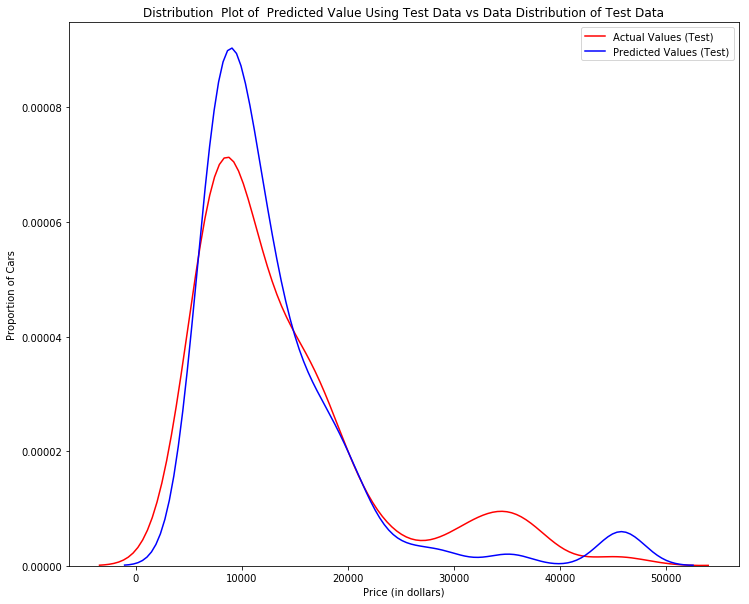

In [38]:
yhat_test1=poly1.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test[(0<=y_test) & (y_test<=50000)], yhat_test1[(0<=yhat_test1) & (yhat_test1 <= 50000)], "Actual Values (Test)", "Predicted Values (Test)", Title)


## RIDGE REGRESSION

In [39]:
pr = PolynomialFeatures(2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [41]:
from sklearn.linear_model import Ridge
Ridgemodel = Ridge(alpha=0.1)
Ridgemodel.fit(x_train_pr,y_train)

yhat = Ridgemodel.predict(x_test_pr)
yhat[0:4]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


array([ 6567.83081933,  9597.97151399, 20836.22326843, 19347.69543463])

In [42]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [45]:
## to select the value of alpha that minimizes the errors:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALPHA = 10 * np.array(range(0,1000))
for a in ALPHA:
    RigeModel = Ridge(alpha=a) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

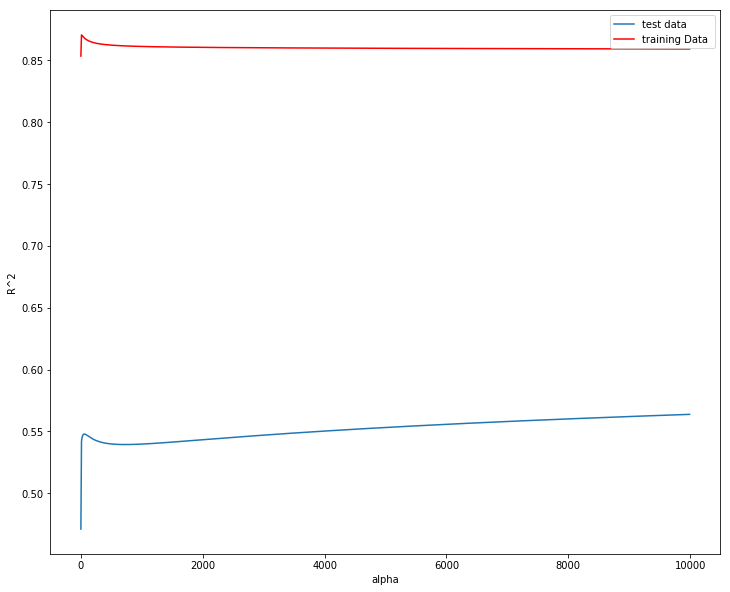

In [46]:
## PLOTTING the DIFFERENT VALUES FOR ALPHA:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALPHA,Rsqu_test, label='test data  ')
plt.plot(ALPHA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## GRIDSEARCH 

In [55]:
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha':[0.001,0.01,0.1,0,1,10,100,1000,10000,100000]},{'normalize':[True,False]}]

RR = Ridge()

grid1 = GridSearchCV(RR,parameters1,cv=4)

grid1.fit(x_train_pr,y_train)
bestestimate = grid1.best_estimator_


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.39159e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.40995e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.2515e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.46361e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.39159e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/

In [56]:
bestestimate

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [58]:
bestestimate.score(x_test_pr, y_test)

0.7847723179113598